In [1]:
import pandas as pd
np = pd.np
import matplotlib.pyplot as plt

In [2]:
suffix = '2019_Feb_28'
df1 = pd.read_csv('data/kaiterra_fieldeggid_15min_{}_panel.csv'.format(suffix), index_col=[0,1], parse_dates=True)
df1.sort_index(inplace=True)
df2 = pd.read_csv('data/govdata/govdata_15min_panel.csv', index_col=[0,1], parse_dates=True)
df2.sort_index(inplace=True)

/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: Mean of empty slice


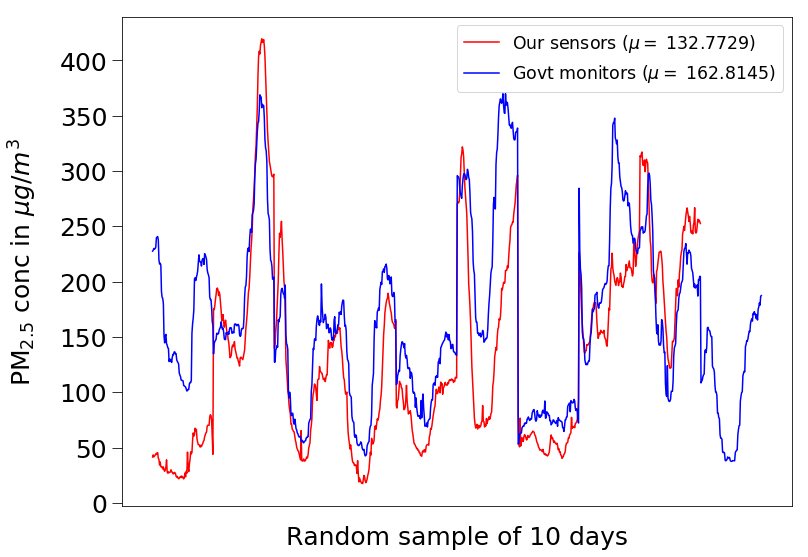

In [50]:
fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(111)

plt.rc('font', size=25)
plt.rc('ps', useafm=True)
plt.rc('pdf', use14corefonts=True)

# random sample of 10 days
seed = 0
np.random.seed(seed)
nsample = 10
days = np.arange(365)
np.random.shuffle(days)
days_select = days[:nsample]

series1 = np.zeros(nsample*96)
series2 = np.zeros(nsample*96)
temp1 = np.zeros((df1.index.levels[0].size, 96))
temp2 = np.zeros((df2.index.levels[0].size, 96))

grouped1 = df1.groupby(level=0)
for count, dayno in enumerate(days_select):
    for locindex, (name1, group1) in enumerate(grouped1):
        temp1[locindex,:] = group1.pm25[dayno*96:(dayno+1)*96].values
    series1[np.arange(count*96, (count+1)*96)] = np.nanmean(temp1, axis=0)

grouped2 = df2.groupby(level=0)
for count, dayno in enumerate(days_select):
    for locindex, (name2, group2) in enumerate(grouped2):
        temp2[locindex,:] = group2.pm25[dayno*96:(dayno+1)*96].values
    series2[np.arange(count*96, (count+1)*96)] = np.nanmean(temp2, axis=0)

# error = np.abs(np.ma.masked_invalid(series1) - np.ma.masked_invalid(series2)).mean()
ax.plot(series1, c='r', label=r'Our sensors ($\mu =$ {:.4f})'.format(np.nanmean(series1)))
ax.plot(series2, c='b', label=r'Govt monitors ($\mu =$ {:.4f})'.format(np.nanmean(series2)))
# ax.set_title('RMSE difference {:.4f}'.format(error))
ax.set_xlabel('Random sample of 10 days', labelpad=20)
ax.set_ylabel(r'PM$_{2.5}$ conc in $\mu g/m^3$', labelpad=20)
ax.legend(loc='best', fontsize='x-small')
ax.tick_params(labelbottom=0, bottom=0, length=10, pad=5)
plt.show()

In [51]:
fig.savefig('data/correlations_seed{}.eps'.format(seed))
plt.close(fig)

In [39]:
print('Kaiterra mean: {}'.format(df1.pm25.mean()))
print('Govtdata mean: {}'.format(df2.pm25.mean()))

Kaiterra mean: 131.51511424917797
Govtdata mean: 159.37728829036269
